<a href="https://colab.research.google.com/github/shanberochka/KFU_Term4_MathModeling/blob/main/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BC%D0%B0%D1%82_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_class_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Right part of ODE

In [ ]:
def f(t, U):
  return (-2*U + 4*t)

## Derivative of the right part of ODE

In [ ]:
def der_f(t, y):
  return -2

## Initial values
 - U_0 - initial value of decision
 - t_0 - start time
 - T - end time
 

In [ ]:
U_0 = 0
t_0 = 0
T = 1

## Analytic decision

In [ ]:
def analytic_decision(t):
  C = (U_0 + 1 -2*t_0)*np.exp(2*t_0)
  return (C*np.exp(-2*t) +2*t - 1)

In [ ]:
class Analysis:
  def __init__(self, U_00, t_00, T0, num, f, der_f, analytic_decision, method='All'):
    self.U_0 = U_00
    self.t_0 = t_00
    self.T = T0
    # num - the value of step
    self.N = [10**i for i in range(1,num+1)]
    self.h_N = [(T - t_0)/n for n in self.N]

    self.f = f
    self.analytic_decision = analytic_decision
    self.der_f = der_f

    self.times_N = self.get_time()
    self.analytic_f = self.get_analytic_f()

    self.method = method
  
  def get_time(self):
    times_N = []
    for n in self.N:
      time= np.linspace(self.t_0, self.T, num = n+1)
      times_N.append(time)
    return times_N
  
  def get_analytic_f(self):
    analytic_f_N = []
    for time in self.times_N:
      analytic_f = self.analytic_decision(time)
      analytic_f_N.append(analytic_f)
    return analytic_f_N
  
  def Eyler(self):
    Y_N= []
    for time in self.times_N:
      Y = []
      y_i = self.U_0
      Y.append(y_i)
      for t in time[:-1]:
        y_ii = y_i + self.h_N[self.times_N.index(time)]*self.f(t, y_i)
        Y.append(y_ii)
        y_i = y_ii
      Y_N.append(Y)
    return Y_N
  
  def Runge_Kutte(self):
    Y_N= []
    for time in self.times_N:
      Y = []
      h_index = self.times_N.index(time)
      y_i = self.U_0
      Y.append(y_i)
      for t in time[:-1]:
        K_1_i = self.f(t, y_i)
        K_2_i = self.f(t + self.h_N[h_index]/2, y_i + self.h_N[h_index]/2 * K_1_i)
        K_3_i = self.f(t + self.h_N[h_index]/2, y_i + self.h_N[h_index]/2 * K_2_i)
        K_4_i = self.f(t + self.h_N[h_index], y_i + self.h_N[h_index] * K_3_i)
        y_ii = y_i + self.h_N[h_index]/6 *(K_1_i + 2 * K_2_i + 2 * K_3_i + K_4_i)
        Y.append(y_ii)
        y_i = y_ii
      Y_N.append(Y)
    return Y_N
  
  def Predictor_Corrector(self):
    Y_N = []
    for time in self.times_N:
      Y=[]
      h_index = self.times_N.index(time)
      y_i = self.U_0
      Y.append(y_i)
      for t in time[:-1]:
        y_1_ii = y_i + self.h_N[h_index]*self.f(t, y_i)
        y_2_ii = y_i + self.h_N[h_index]/2*(self.f(t, y_i)+self.f(time[((np.where(time == t)[0].tolist()[0]))+1], y_1_ii))
        Y.append(y_2_ii)
        y_i = y_2_ii
      Y_N.append(Y)
    return Y_N

  def Simple_Iterations(self):
    Y_N = []
    eps = 1e-3
    #s_max = []
    for time in self.times_N:
      Y = []
      #max_ = 0
      h_index = self.times_N.index(time)
      y_i = self.U_0
      Y.append(y_i)
      for t in time[:-1]:
        s = 0
        next_t = time[((np.where(time == t)[0].tolist()[0]))+1]
        y_old = y_i
        y_new = y_i + self.h_N[h_index]/2*(self.f(t, y_i)+self.f(next_t, y_old))
        delta = abs(y_new - y_old)
        y_old = y_new
        s+=1
        while (delta > eps) and (s < 10**(6)):
          y_new = y_i + self.h_N[h_index]/2*(self.f(t, y_i) + self.f(next_t, y_old))
          delta = abs(y_new - y_old)
          y_old = y_new
          s+=1
        #max_ = max(max_, s)
        y_i = y_old
        Y.append(y_i)
      #s_max.append(max_)
      Y_N.append(Y)
    return Y_N#, s_max

  def Simple_Iterations_eps(self, time_h, h_, eps):
    Y_eps = []
    h = h_
    s_max = []
    time = time_h
    for e in eps:
      max_ = 0
      Y = []
      y_i = self.U_0
      Y.append(y_i)
      for t in time[:-1]:
        s = 0
        next_t = t+h
        y_old = y_i
        y_new = y_i + h/2*(self.f(t, y_i) + self.f(next_t, y_old))
        delta = abs(y_old - y_new)
        y_old = y_new
        s+=1
        while (delta > e) and (s < 10**(7)):
          y_new = y_i + h/2*(self.f(t, y_i) + self.f(next_t, y_old))
          delta = abs(y_old - y_new)
          y_old = y_new
          s+=1
        max_ = max(max_, s)
        y_i = y_old
        Y.append(y_new)
      Y_eps.append(Y)
      s_max.append(max_)
    return Y_eps, s_max

  def Newton(self):
    def F(t, next_t, x, old_y, h, f):
      return x - old_y - h/2*(f(t, old_y) + f(next_t, x))
    def der_F(next_t, x, h, der_f):
      return 1 - h/2*der_f(next_t, x)
    Y_N = []
    eps = 1e-3
    for time in self.times_N:
      Y = []
      h_index = self.times_N.index(time)
      y_i = U_0
      Y.append(y_i)
      for t in time[:-1]:
        x = y_i
        next_t = t+self.h_N[h_index]
        Func = F(t, next_t, x, Y[-1], self.h_N[h_index], f)
        der_Func = der_F(next_t, x, self.h_N[h_index], der_f)
        x_next = x - Func/der_Func
        while (abs(x - x_next) > eps):
          x = x_next
          Func = F(t, next_t, x, Y[-1],self.h_N[h_index], f)
          der_Func = der_F(next_t, x, self.h_N[h_index], der_f)
          x_next = x - Func/der_Func
        y_i = x_next
        Y.append(y_i)
      Y_N.append(Y)
    return Y_N

  #def convergence_analysis(self, dist):
    #K = []
    #for i in range(len(dist)):
      #K.append(dist[i] / )

  def distance(self,Y, A):
    d = []
    for y, a in zip(Y, A):
      d.append(abs(y-a))
    return max(d)

  def plot_graphics(self, A, Y, label):
    n = len(Y)
    fig, axs = plt.subplots(n, figsize=(20,15))
    fig.tight_layout(pad=3.0)
    for i in range(n):
      axs[i].plot(self.times_N[i], A[i], 'k.', label='точное решение', markersize=1);
      axs[i].plot(self.times_N[i], Y[i], 'r-', label='приближенное решение', linewidth=0.5);
      axs[i].set(xlabel='t', ylabel='U', title=chr(i+97)+" " + label);
      axs[i].legend(loc='upper left');
#plt.show()

  def train(self):
    if (self.method == 'All'):
      Y_N_Eyler = self.Eyler()
      Y_N_RK = self.Runge_Kutte()
      Y_N_PC = self.Predictor_Corrector()
      Y_N_SI, _ = self.Simple_Iterations()
      Y_N_Newton = self.Newton()
      self.plot_graphics(self.analytic_f, Y_N_Eyler, 'Eyler')
      self.plot_graphics(self.analytic_f, Y_N_RK, 'Runge-Kutte')
      self.plot_graphics(self.analytic_f, Y_N_PC, 'Predictor-Corrector')
      self.plot_graphics(self.analytic_f, Y_N_SI, 'Simple Iterations')
      self.plot_graphics(self.analytic_f, Y_N_Newton, 'Newton')
      diff_Eyler = [self.distance(Y_N_Eyler[i], self.analytic_f[i]) for i in range(len(Y_N_Eyler))]
      diff_RK = [self.distance(Y_N_RK[i], self.analytic_f[i]) for i in range(len(Y_N_RK))]
      diff_PC = [self.distance(Y_N_PC[i], self.analytic_f[i]) for i in range(len(Y_N_PC))]
      diff_SI = [self.distance(Y_N_SI[i], self.analytic_f[i]) for i in range(len(Y_N_SI))]
      diff_Newton = [self.distance(Y_N_Newton[i], self.analytic_f[i]) for i in range(len(Y_N_Newton))]

      table = pd.DataFrame(list(zip(diff_Eyler,diff_RK, diff_PC, diff_SI, diff_Newton)), columns=['Eyler', 'Runge-Kutte', 'Predictor-Corrector', 'Simple Iterations', 'Newton'], index=[h for h in self.h_N])
      print(table)

    elif (self.method == 'Eyler'):
      Y_N_Eyler = self.Eyler()
      self.plot_graphics(self.analytic_f, Y_N_Eyler, 'Eyler')
      diff_Eyler = [self.distance(Y_N_Eyler[i], self.analytic_f[i]) for i in range(len(Y_N_Eyler))]
      table = pd.DataFrame(list(zip(self.h_N, diff_Eyler)), columns=['h','\u03C8'])
      print('Eyler')
      print(table)
      

    elif (self.method == 'Runge-Kutte'):
      Y_N_RK = self.Runge_Kutte()
      self.plot_graphics(self.analytic_f, Y_N_RK, 'Runge-Kutte')
      diff_RK = [self.distance(Y_N_RK[i], self.analytic_f[i]) for i in range(len(Y_N_RK))]
      table = pd.DataFrame(list(zip(self.h_N, diff_RK)), columns=['h','\u03C8'])
      print('Runge-Kutte')
      print(table)

    elif (self.method == 'Predictor-Corrector'):
      Y_N_PC = self.Predictor_Corrector()
      self.plot_graphics(self.analytic_f, Y_N_PC, 'Predictor-Corrector')
      diff_PC = [self.distance(Y_N_PC[i], self.analytic_f[i]) for i in range(len(Y_N_PC))]
      table = pd.DataFrame(list(zip(self.h_N, diff_PC)), columns=['h','\u03C8'])
      print('Predictor-Corrector')
      print(table)

    elif (self.method == 'Simple Iterations'):
      Y_N_SI = self.Simple_Iterations()
      print('len Y=', len(Y_N_SI))
      self.plot_graphics(self.analytic_f, Y_N_SI, 'Simple Iteratations')
      diff_SI = [self.distance(Y_N_SI[i], self.analytic_f[i]) for i in range(len(Y_N_SI))]
      table = pd.DataFrame(list(zip(self.h_N, diff_SI)), columns=['h','\u03C8'])
      print('Simple Iterations')
      print(table)
      

    elif (self.method == 'Simple Iterations eps'):
      N = 100
      h = (self.T - self.t_0 )/N
      time = np.linspace(self.t_0, self.T, N)
      eps = [10**(-i) for i in range(1, 10)]
      Y_N_SI, s_max = self.Simple_Iterations_eps(time, h, eps)
      analytic_f = self.analytic_decision(time)
      diff_SI = [self.distance(Y_N_SI[i], analytic_f) for i in range(len(Y_N_SI))]
      table = pd.DataFrame(list(zip(eps, diff_SI, s_max)), columns=['eps', '\u03C8','s_max'])
      print('Simple Iteratations')
      print(table)

      n = len(Y_N_SI)
      fig, axs = plt.subplots(n, figsize=(20,15))
      fig.tight_layout(pad=3.0)
      for i in range(n):
        axs[i].plot(time, analytic_f, 'k.', label='точное решение', markersize=1);
        axs[i].plot(time, Y_N_SI[i], 'r-', label='приближенное решение', linewidth=0.5);
        axs[i].set(xlabel='t', ylabel='U', title=chr(i+97)+" Simple Iteratations eps={}".format(eps[i]));
        axs[i].legend(loc='upper left');
    
    elif (self.method == 'Newton'):
      Y_N_Newton = self.Newton()
      self.plot_graphics(self.analytic_f, Y_N_Newton, 'Newton')
      diff_Newton = [self.distance(Y_N_Newton[i], self.analytic_f[i]) for i in range(len(Y_N_Newton))]
      table = pd.DataFrame(list(zip(self.h_N, diff_Newton)), columns=['h','\u03C8'])
      print('Newton')
      print(table);
    else:
      print("Method is not defined")

# Class Analysis:
- U_0 - initial value of decision
- t_0 - ititial time
- T - end time
- num(in our case 5) - parametr to make interval with $10^{-i}$ points, where i = $\overline{(1, num)}$
- f - right part of DE
- der_f - the derivative of f function
- analytic_decision - analytic decision 
- method - method to solve DE(following can be choosen): 
 - Eyler
 - Runge-Kutte
 - Predictor-Corrector
 - Simple Iterations
 - Simple Iterations with changing epsilon
 - Newton


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Eyler
         h         ψ
0  0.10000  0.040199
1  0.01000  0.003710
2  0.00100  0.000368
3  0.00010  0.000037
4  0.00001  0.000004


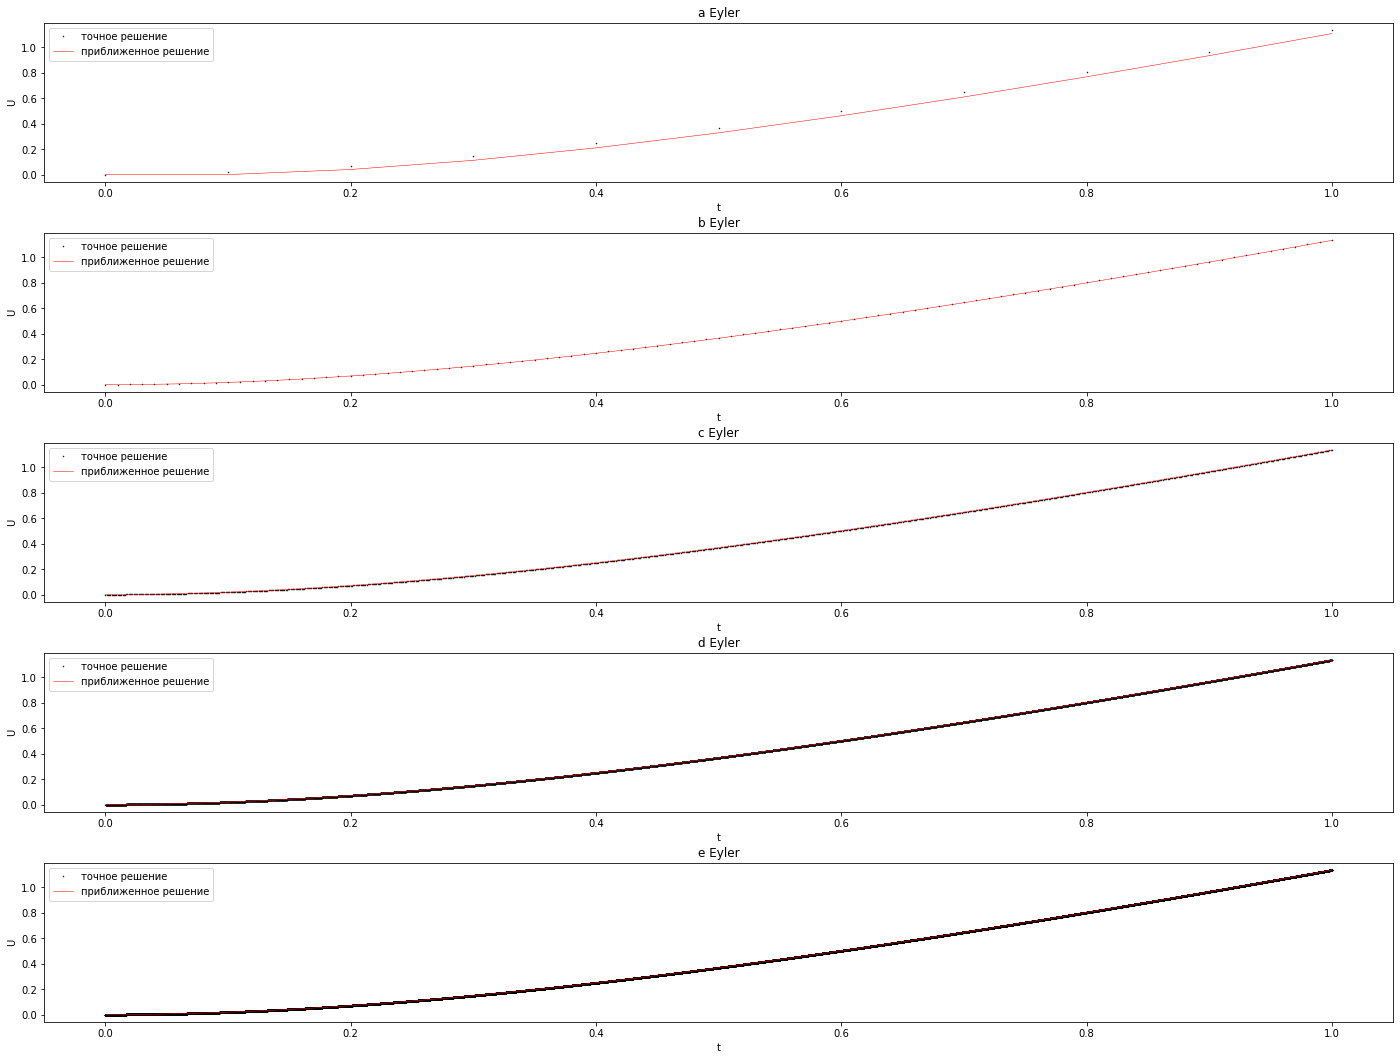

In [ ]:
table = Analysis(U_0, t_0, T, 5, f, der_f, analytic_decision, method = 'Eyler')
table.train()

## Make half step